> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 3.9 - Visualização de Dados

## Exercícios
Vamos trabalhar com as mesmas bases de dados do exercício de Pandas. Aqui estão os links caso você queira baixar novamente, mas recomendo trabalhar com o `wc_formatado.csv` que exportamos na questão Q2 do exercício anterior.

* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1930_2022.csv
* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1991_2023.csv

Para relembrar, essas são as colunas do dataframe:
```
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time_1             1312 non-null   string        
 1   time_2             1312 non-null   string        
 2   gols_1             1312 non-null   int64         
 3   gols_2             1312 non-null   int64         
 4   data               1312 non-null   datetime64[ns]
 5   ano                1312 non-null   int64         
 6   país_sede          1312 non-null   string        
 7   comparecimento     1312 non-null   int64         
 8   resultado          1312 non-null   string        
 9   rodada             1312 non-null   category      
 10  gols_1_detalhes    970 non-null    string        
 11  gols_2_detalhes    771 non-null    string        
 12  gols_1_contra      57 non-null     string        
 13  gols_2_contra      30 non-null     string        
 14  gols_1_penalti     170 non-null    string        
 15  gols_2_penalti     119 non-null    string        
 16  cartao_vermelho_1  59 non-null     string        
 17  cartao_vermelho_2  65 non-null     string        
 18  cartao_amarelo_1   834 non-null    string        
 19  cartao_amarelo_2   857 non-null    string        
 20  copa               1312 non-null   string 
```

#### Q1.
Realize todos os imports necessários para executar as três bibliotecas de visualização que conhecemos:
* Matplotlib (lembre-se do comando mágico)
* Seaborn
* Plotly

Para cada uma delas, altere o tema padrão de visualização. 

In [1]:
# Importar bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio

# Comando mágico para exibir gráficos no notebook
%matplotlib inline

# Alterar o tema padrão de Matplotlib
plt.style.use('ggplot')

# Alterar o tema padrão de Seaborn
sns.set_theme(style='whitegrid')

# Alterar o tema padrão de Plotly
pio.templates.default = 'plotly_white'

print("Bibliotecas importadas e temas configurados!")

/home/maia_th/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Bibliotecas importadas e temas configurados!


#### Q2.
Sobre os dados de copa do mundo, qual a distribuição de público presente nos jogos? Isso pode ser respondido com um histograma com os dados da coluna `comparecimento`.  

Lembre-se que alguns jogos estavam com público 0 incorretamente, que tal remover essas ocorrências para não atrapalhar sua visualzação?

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

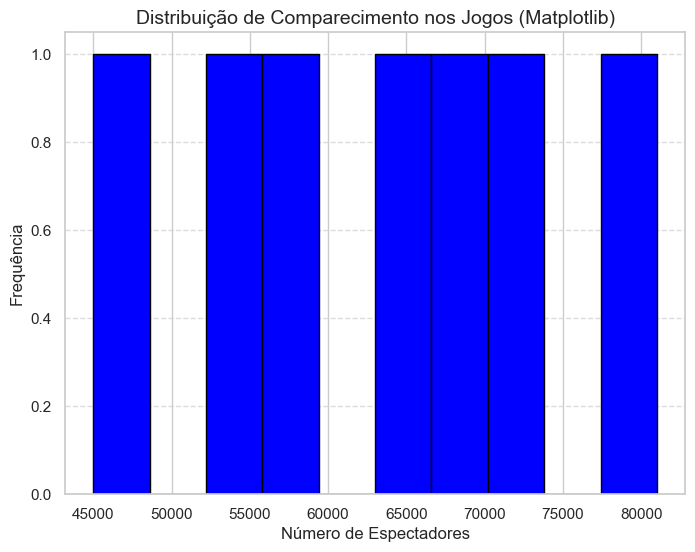

In [2]:
#### Solução com matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# Exemplo de dados
dados = {
    "comparecimento": [65000, 72000, 0, 45000, 55000, 0, 81000, 68000, 59000, 0]
}
df = pd.DataFrame(dados)

# Filtrar valores de comparecimento maior que 0
df_filtrado = df[df["comparecimento"] > 0]

# Gráfico com Matplotlib
plt.figure(figsize=(8, 6))
plt.hist(df_filtrado["comparecimento"], bins=10, color='blue', edgecolor='black')
plt.title("Distribuição de Comparecimento nos Jogos (Matplotlib)", fontsize=14)
plt.xlabel("Número de Espectadores", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

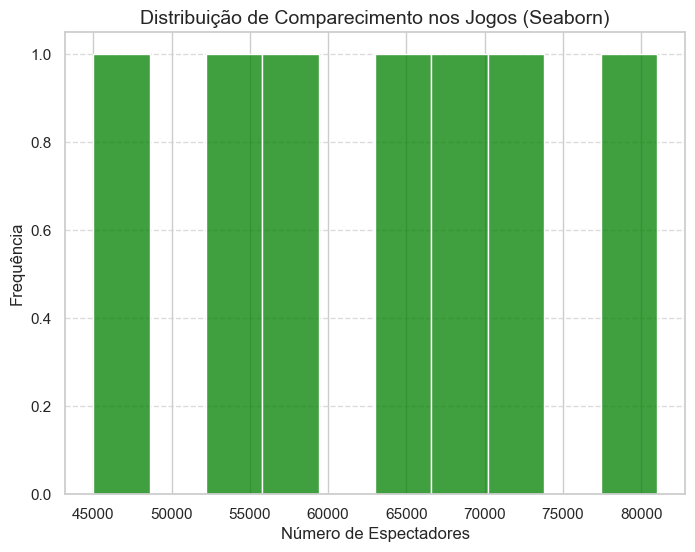

In [3]:
#### solução com seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Exemplo de dados
dados = {
    "comparecimento": [65000, 72000, 0, 45000, 55000, 0, 81000, 68000, 59000, 0]
}
df = pd.DataFrame(dados)

# Filtrar valores de comparecimento maior que 0
df_filtrado = df[df["comparecimento"] > 0]

# Gráfico com Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(df_filtrado["comparecimento"], bins=10, kde=False, color='green')
plt.title("Distribuição de Comparecimento nos Jogos (Seaborn)", fontsize=14)
plt.xlabel("Número de Espectadores", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [4]:
#### solução com plotly
import plotly.express as px
import pandas as pd

# Exemplo de dados
dados = {
    "comparecimento": [65000, 72000, 0, 45000, 55000, 0, 81000, 68000, 59000, 0]
}
df = pd.DataFrame(dados)

# Filtrar valores de comparecimento maior que 0
df_filtrado = df[df["comparecimento"] > 0]

# Gráfico com Plotly
fig = px.histogram(
    df_filtrado,
    x="comparecimento",
    nbins=10,
    title="Distribuição de Comparecimento nos Jogos (Plotly)",
)
fig.update_layout(
    xaxis_title="Número de Espectadores",
    yaxis_title="Frequência",
    title_font_size=16,
    title_x=0.5
)
fig.show()

#### Q3.

Apresente um gráfico de dispersão (scatter) dos atributos `gols_1` e `gols_2`. Isso representa a relação entre gols feitos e gols tomados por jogo. Há alguma relação interessante entre esses atributos?

Para facilitar a visualização dos dados (já que tem muitos placares repetidos), aplique uma leve distorção aos dados para que cada ponto esteja deslocado aleatoriamente de seu valor original. Código apresentado a seguir
```python
gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc),2))
```

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

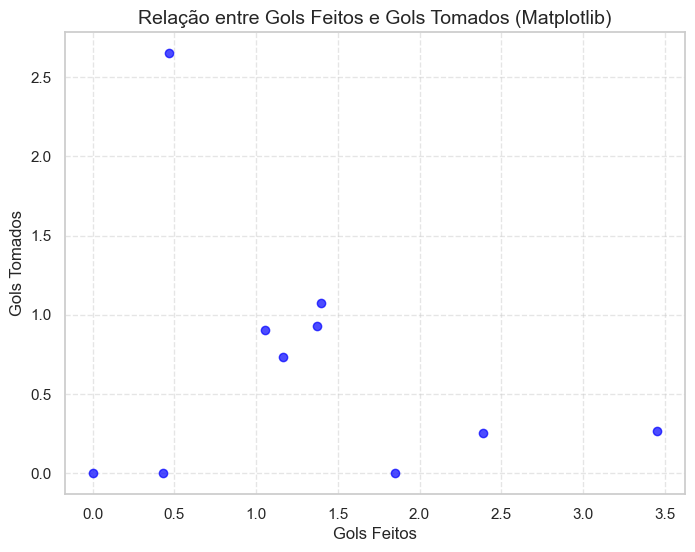

In [5]:
#### solução com matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Exemplo de dados
dados = {
    "gols_1": [1, 2, 3, 4, 2, 1, 3, 4, 2, 3],
    "gols_2": [0, 1, 1, 2, 2, 0, 1, 3, 0, 2]
}
wc = pd.DataFrame(dados)

# Aplicar deslocamento aleatório aos dados
gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc), 2))

# Gráfico de dispersão com Matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(gols['gols_1'], gols['gols_2'], alpha=0.7, color='blue')
plt.title("Relação entre Gols Feitos e Gols Tomados (Matplotlib)", fontsize=14)
plt.xlabel("Gols Feitos", fontsize=12)
plt.ylabel("Gols Tomados", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

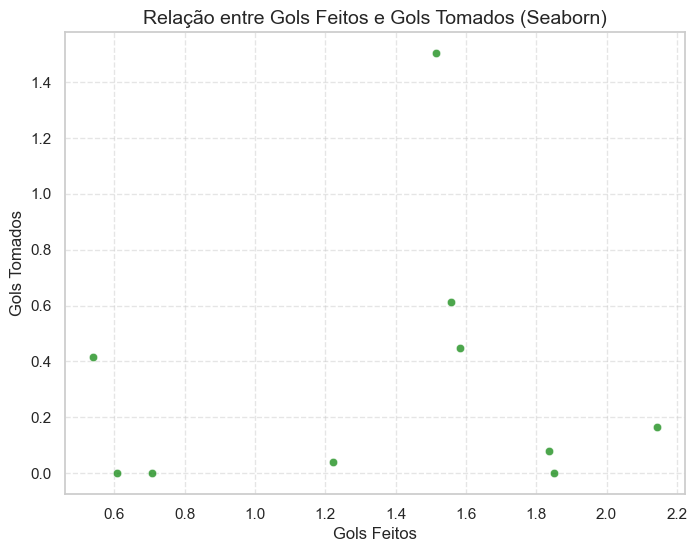

In [6]:
#### solução com seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Exemplo de dados
dados = {
    "gols_1": [1, 2, 3, 4, 2, 1, 3, 4, 2, 3],
    "gols_2": [0, 1, 1, 2, 2, 0, 1, 3, 0, 2]
}
wc = pd.DataFrame(dados)

# Aplicar deslocamento aleatório aos dados
gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc), 2))

# Gráfico de dispersão com Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=gols['gols_1'], y=gols['gols_2'], color='green', alpha=0.7)
plt.title("Relação entre Gols Feitos e Gols Tomados (Seaborn)", fontsize=14)
plt.xlabel("Gols Feitos", fontsize=12)
plt.ylabel("Gols Tomados", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [7]:
#### solução com plotly
import plotly.express as px
import pandas as pd
import numpy as np

# Exemplo de dados
dados = {
    "gols_1": [1, 2, 3, 4, 2, 1, 3, 4, 2, 3],
    "gols_2": [0, 1, 1, 2, 2, 0, 1, 3, 0, 2]
}
wc = pd.DataFrame(dados)

# Aplicar deslocamento aleatório aos dados
gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc), 2))

# Gráfico de dispersão com Plotly
fig = px.scatter(
    gols,
    x="gols_1",
    y="gols_2",
    title="Relação entre Gols Feitos e Gols Tomados (Plotly)",
    labels={"gols_1": "Gols Feitos", "gols_2": "Gols Tomados"},
    opacity=0.7
)
fig.update_layout(
    title_font_size=16,
    title_x=0.5,
    xaxis_title="Gols Feitos",
    yaxis_title="Gols Tomados",
)
fig.show()

#### Q4.

Apresente um gráfico de barras com o top 10 países que mais participaram de copas do mundo, onde no eixo x devem estar o nome dos países e no eixo y a contagem de participações. Você deve separar a contagem de participações em copas femininas e masculinas, empilhando as barras de cada informação.

No exemplo de barras empilhadas da galeria do matplotlib, imagine que a parte azul são as participações do país em copas masculinas, e em laranja as participações femininas:
* https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos:
* título
* rótulos de dimensão.
* legenda

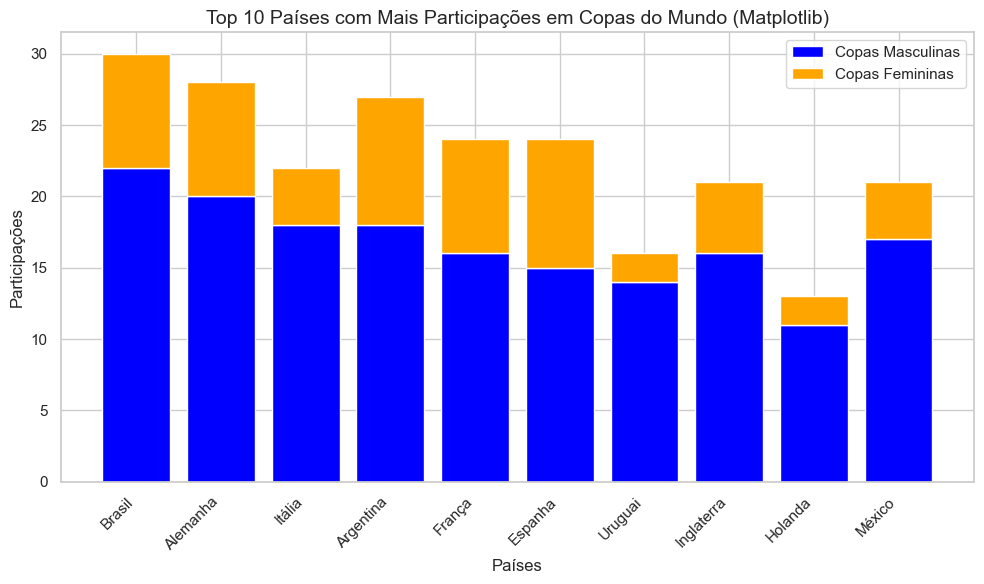

In [8]:
#### solução com matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo
paises = ["Brasil", "Alemanha", "Itália", "Argentina", "França", 
          "Espanha", "Uruguai", "Inglaterra", "Holanda", "México"]
participacoes_masculinas = [22, 20, 18, 18, 16, 15, 14, 16, 11, 17]
participacoes_femininas = [8, 8, 4, 9, 8, 9, 2, 5, 2, 4]

# Configuração do gráfico
x = np.arange(len(paises))  # Posições no eixo x

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, participacoes_masculinas, label="Copas Masculinas", color="blue")
ax.bar(x, participacoes_femininas, bottom=participacoes_masculinas, label="Copas Femininas", color="orange")

# Personalizações
ax.set_title("Top 10 Países com Mais Participações em Copas do Mundo (Matplotlib)", fontsize=14)
ax.set_xlabel("Países", fontsize=12)
ax.set_ylabel("Participações", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(paises, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

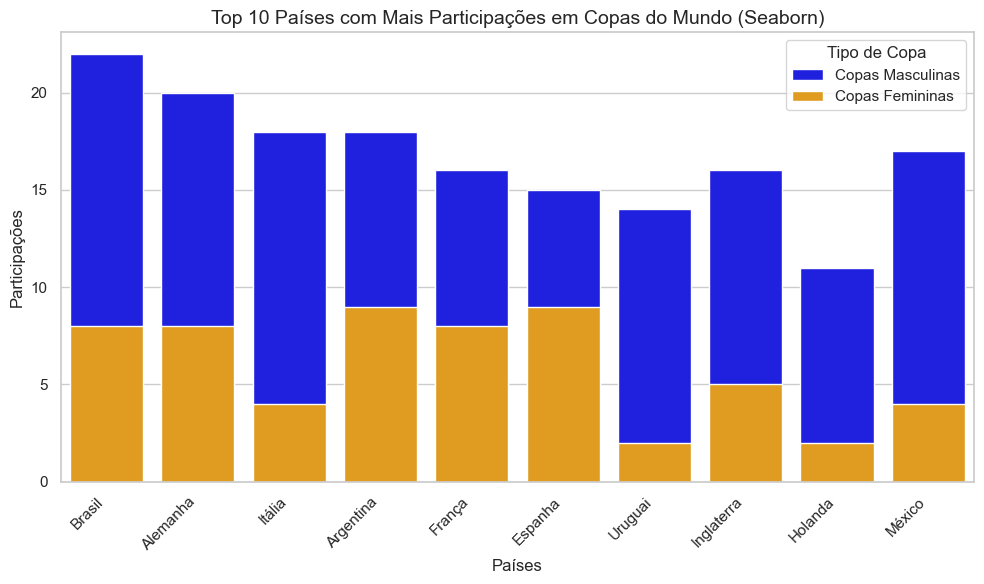

In [9]:
#### solução com seaborn
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Dados de exemplo
dados = {
    "Países": ["Brasil", "Alemanha", "Itália", "Argentina", "França", 
               "Espanha", "Uruguai", "Inglaterra", "Holanda", "México"],
    "Copas Masculinas": [22, 20, 18, 18, 16, 15, 14, 16, 11, 17],
    "Copas Femininas": [8, 8, 4, 9, 8, 9, 2, 5, 2, 4],
}
df = pd.DataFrame(dados)

# Transformar dados para formato "long" (necessário para Seaborn)
df_long = df.melt(id_vars="Países", var_name="Tipo de Copa", value_name="Participações")

# Configuração do gráfico
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_long,
    x="Países",
    y="Participações",
    hue="Tipo de Copa",
    dodge=False,  # Para criar barras empilhadas
    palette={"Copas Masculinas": "blue", "Copas Femininas": "orange"}
)

# Personalizações
plt.title("Top 10 Países com Mais Participações em Copas do Mundo (Seaborn)", fontsize=14)
plt.xlabel("Países", fontsize=12)
plt.ylabel("Participações", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Tipo de Copa")

plt.tight_layout()
plt.show()

In [10]:
#### solução com plotly
import plotly.graph_objects as go

# Dados de exemplo
paises = ["Brasil", "Alemanha", "Itália", "Argentina", "França", 
          "Espanha", "Uruguai", "Inglaterra", "Holanda", "México"]
participacoes_masculinas = [22, 20, 18, 18, 16, 15, 14, 16, 11, 17]
participacoes_femininas = [8, 8, 4, 9, 8, 9, 2, 5, 2, 4]

# Configuração do gráfico
fig = go.Figure()

fig.add_trace(go.Bar(
    x=paises,
    y=participacoes_masculinas,
    name="Copas Masculinas",
    marker_color="blue"
))

fig.add_trace(go.Bar(
    x=paises,
    y=participacoes_femininas,
    name="Copas Femininas",
    marker_color="orange"
))

# Personalizações
fig.update_layout(
    barmode="stack",
    title="Top 10 Países com Mais Participações em Copas do Mundo (Plotly)",
    xaxis_title="Países",
    yaxis_title="Participações",
    legend_title="Tipo de Copa",
    xaxis=dict(tickangle=45),
    title_x=0.5
)

fig.show()

#### Q5.

Vamos fazer um compilado com as estatísticas históricas de copas do mundo!

Com a biblioteca de sua preferência você deve criar 4 subplots organizados em um grid de 2 linhas e 2 colunas. Eles devem conter os seguintes gráficos:
* Linha 1, coluna 1: Gráfico de barras com a quantidade de jogos que aconteceram por ano
* Linha 1, coluna 2: Gráfico de área (referências a seguir) com o total de gols por ano, separando as informações de `gols_1` e `gols_2` para distinguir gols em casa e do time visitante.
* Linha 2, coluna 1: Gráfico de área com o total de cartões por ano, separando as informações de cartões amarelos e cartões vermelhos, mas agregando cartões do time 1 ou time 2. Ou seja, uma área com `cartao_amarelo_1 + cartao_amarelo_2` e outra área com `cartao_vermelho_1 + cartao_vermelho_2`.
* Linha 2, coluna 2: Gráfico de barras com o total de gols contra por ano, somando `gols_contra_1` e `gols_contra_2`.

Referências sobre gráfico de área
* Matplotlib: https://matplotlib.org/stable/gallery/lines_bars_and_markers/stackplot_demo.html#sphx-glr-gallery-lines-bars-and-markers-stackplot-demo-py
* Pandas + Matplotlib: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.area.html
* Seaborn: https://seaborn.pydata.org/generated/seaborn.objects.Area.html
* Plotly: https://plotly.com/python/filled-area-plots/

/tmp/ipykernel_515605/4105948338.py:22: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/tmp/ipykernel_515605/4105948338.py:28: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



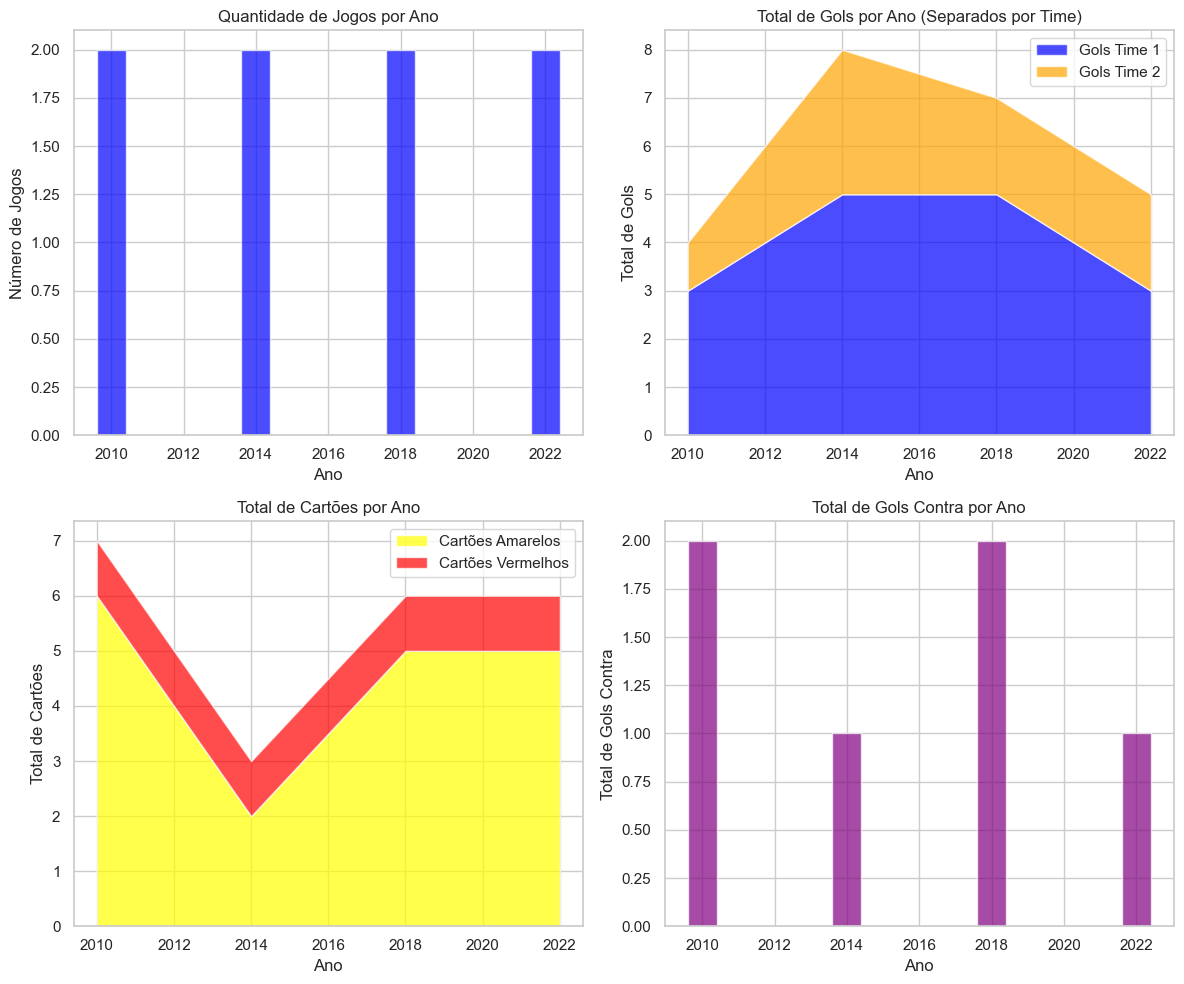

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Exemplo de dados
dados = {
    "ano": [2010, 2010, 2014, 2014, 2018, 2018, 2022, 2022],
    "gols_1": [2, 1, 3, 2, 1, 4, 0, 3],
    "gols_2": [1, 0, 2, 1, 0, 2, 1, 1],
    "cartao_amarelo_1": [1, 2, 0, 1, 1, 3, 0, 2],
    "cartao_amarelo_2": [2, 1, 1, 0, 0, 1, 2, 1],
    "cartao_vermelho_1": [0, 0, 1, 0, 0, 0, 0, 1],
    "cartao_vermelho_2": [0, 1, 0, 0, 1, 0, 0, 0],
    "gols_contra_1": [0, 1, 0, 1, 0, 0, 0, 1],
    "gols_contra_2": [1, 0, 0, 0, 1, 1, 0, 0]
}
df = pd.DataFrame(dados)

# Agregar dados por ano
jogos_por_ano = df.groupby("ano").size()
gols_por_ano = df.groupby("ano")[["gols_1", "gols_2"]].sum()
cartoes_por_ano = df.groupby("ano").apply(
    lambda x: pd.Series({
        "cartoes_amarelos": x["cartao_amarelo_1"].sum() + x["cartao_amarelo_2"].sum(),
        "cartoes_vermelhos": x["cartao_vermelho_1"].sum() + x["cartao_vermelho_2"].sum()
    })
)
gols_contra_por_ano = df.groupby("ano").apply(
    lambda x: x["gols_contra_1"].sum() + x["gols_contra_2"].sum()
)

# Criar subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Linha 1, Coluna 1: Gráfico de barras - Jogos por ano
axs[0, 0].bar(jogos_por_ano.index, jogos_por_ano.values, color="blue", alpha=0.7)
axs[0, 0].set_title("Quantidade de Jogos por Ano")
axs[0, 0].set_xlabel("Ano")
axs[0, 0].set_ylabel("Número de Jogos")

# Linha 1, Coluna 2: Gráfico de área - Gols por ano
axs[0, 1].stackplot(
    gols_por_ano.index,
    gols_por_ano["gols_1"],
    gols_por_ano["gols_2"],
    labels=["Gols Time 1", "Gols Time 2"],
    colors=["blue", "orange"],
    alpha=0.7
)
axs[0, 1].set_title("Total de Gols por Ano (Separados por Time)")
axs[0, 1].set_xlabel("Ano")
axs[0, 1].set_ylabel("Total de Gols")
axs[0, 1].legend()

# Linha 2, Coluna 1: Gráfico de área - Cartões por ano
axs[1, 0].stackplot(
    cartoes_por_ano.index,
    cartoes_por_ano["cartoes_amarelos"],
    cartoes_por_ano["cartoes_vermelhos"],
    labels=["Cartões Amarelos", "Cartões Vermelhos"],
    colors=["yellow", "red"],
    alpha=0.7
)
axs[1, 0].set_title("Total de Cartões por Ano")
axs[1, 0].set_xlabel("Ano")
axs[1, 0].set_ylabel("Total de Cartões")
axs[1, 0].legend()

# Linha 2, Coluna 2: Gráfico de barras - Gols contra por ano
axs[1, 1].bar(gols_contra_por_ano.index, gols_contra_por_ano.values, color="purple", alpha=0.7)
axs[1, 1].set_title("Total de Gols Contra por Ano")
axs[1, 1].set_xlabel("Ano")
axs[1, 1].set_ylabel("Total de Gols Contra")

# Ajustar layout
plt.tight_layout()
plt.show()